# 卷积神经网络
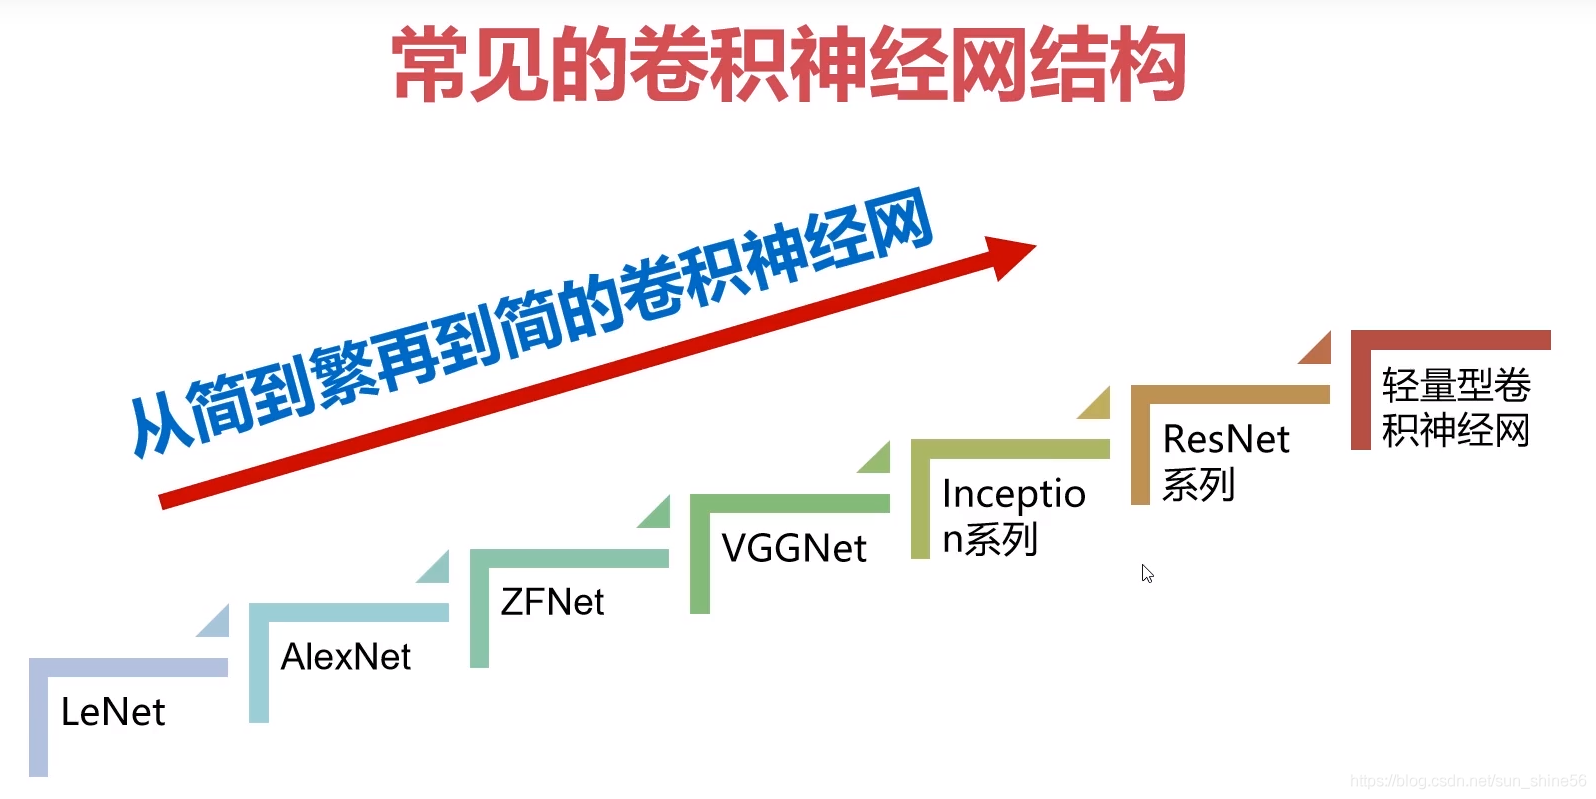
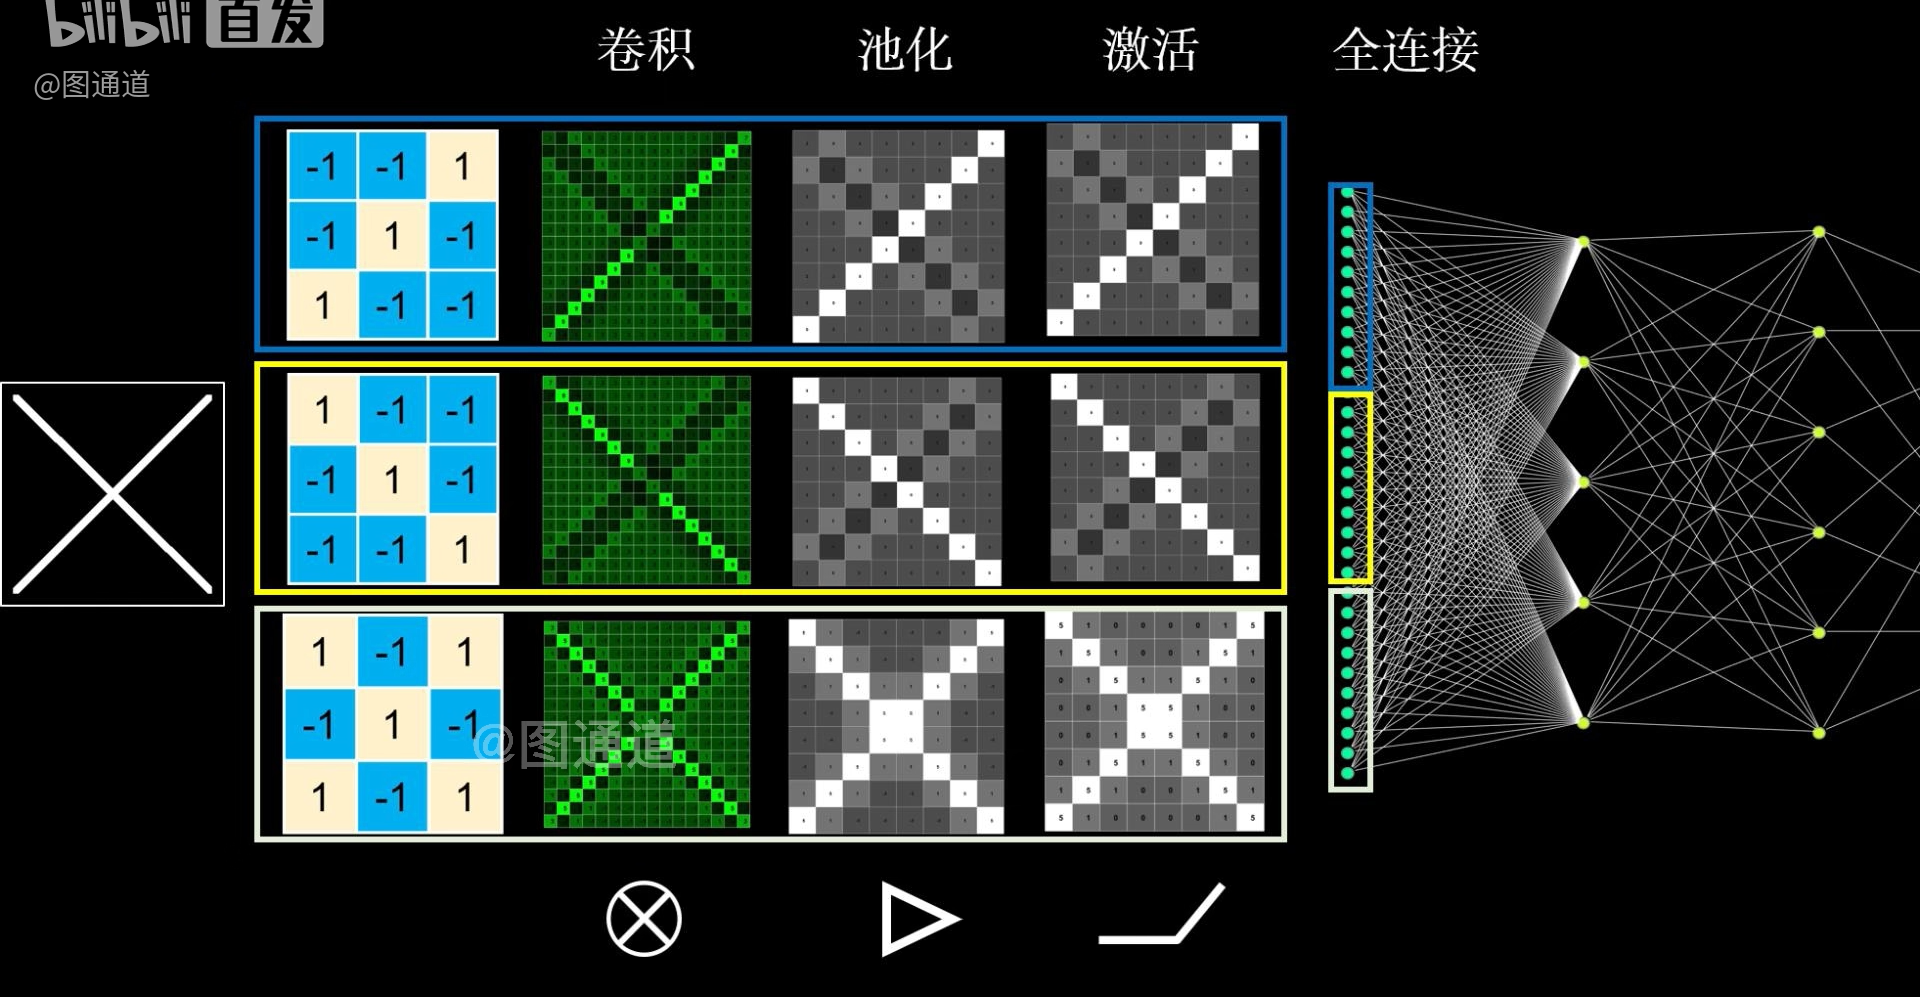

# LeNet在 Minist手写数字数据集
LeNet在1998年被提出，是进行写数字识别的网络。
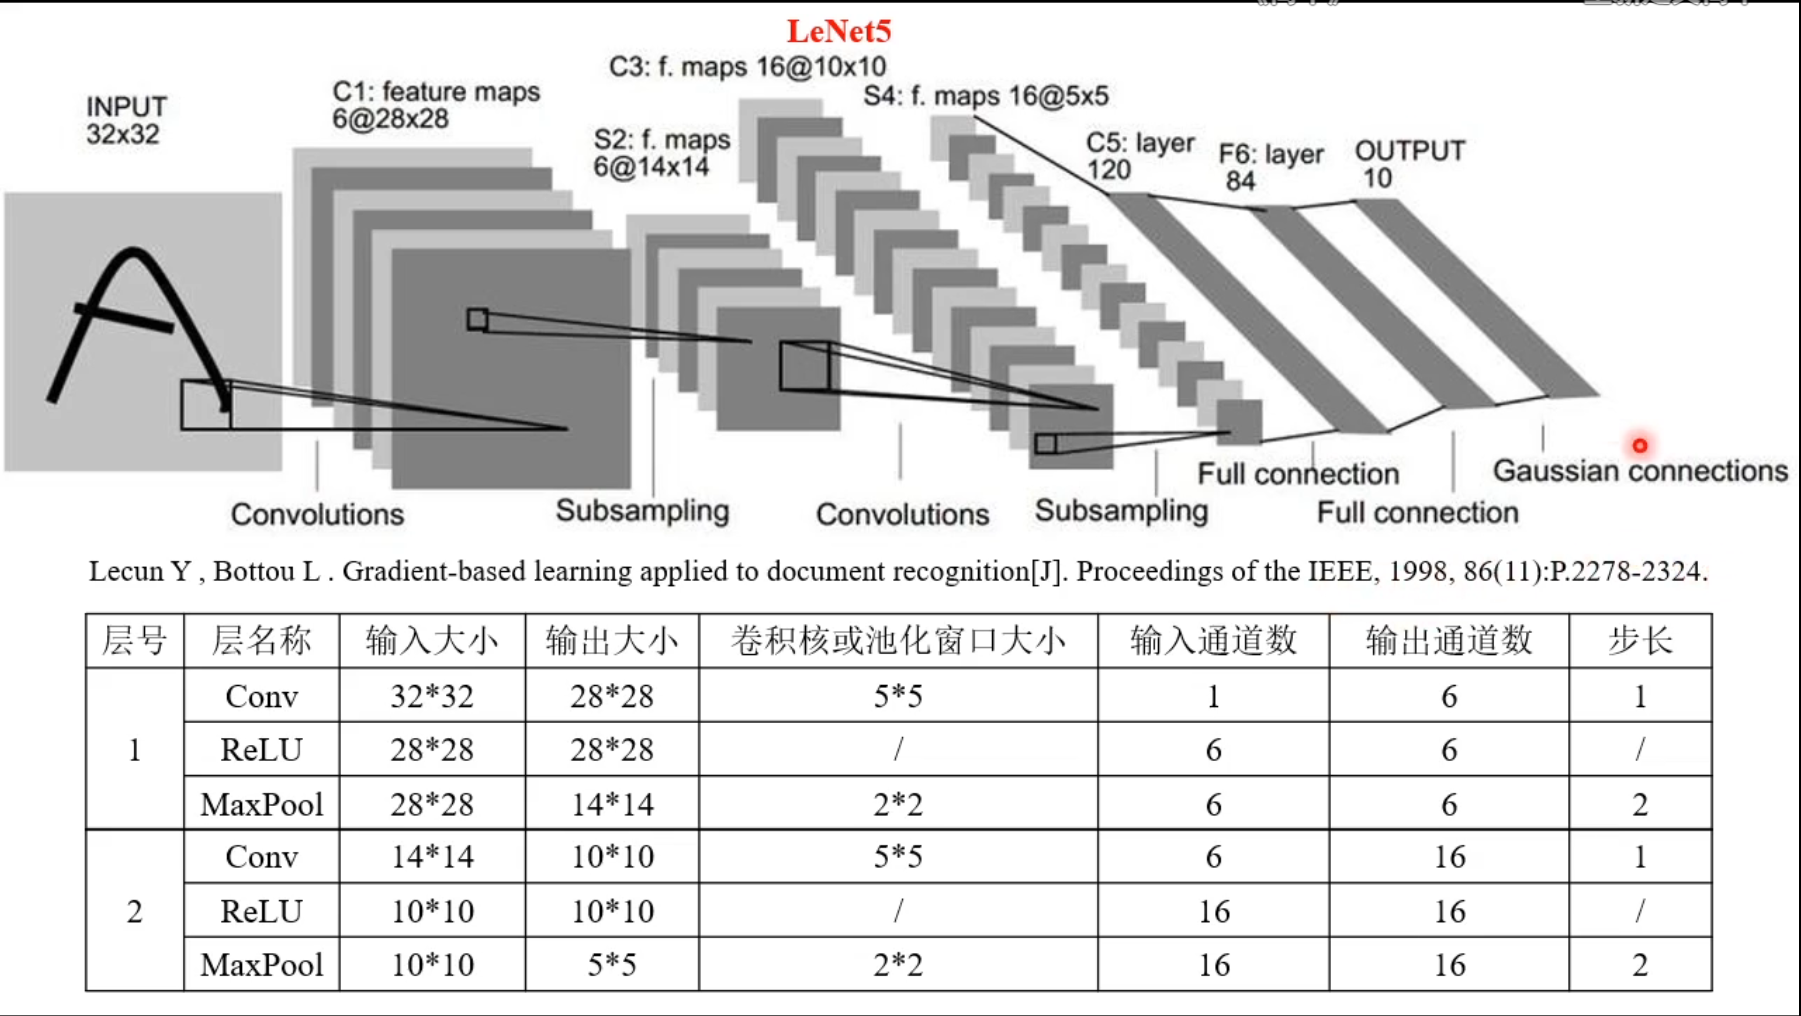

# 以下为 CIFAR-10数据集为例-----------------------------------------------

CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ a叩lane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。
--
![CIFAR-10数据集.jpg](./CIFAR-10数据集.jpg)

# Define a Convolutional Neural Network   定义网络结构

In [3]:
# 使用torch.nn包来构建神经网络.
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module):                  # 继承于nn.Module这个父类
    def __init__(self):                  # 初始化网络结构
        super(LeNet, self).__init__()    # 多继承需用到super函数
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):            # 正向传播过程
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28)
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)-----展开成一维数据，-1意思是计算机自动推理
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)
        return x
    
LeNet = LeNet() #网络实例化
print(LeNet)

LeNet(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=800, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
#查看源码
nn.Conv2d??

In [10]:
#做个测试，测试网络结构
import torch
input1= torch.rand([32,3,32,32])
print(LeNet(input1))

tensor([[ 0.0023, -0.0721,  0.0194,  0.1145, -0.0581,  0.1295,  0.0553, -0.0050,
         -0.0546,  0.1205],
        [ 0.0094, -0.0739,  0.0181,  0.1148, -0.0574,  0.1304,  0.0547, -0.0117,
         -0.0519,  0.1257],
        [ 0.0060, -0.0679,  0.0238,  0.1094, -0.0625,  0.1310,  0.0544, -0.0060,
         -0.0506,  0.1222],
        [ 0.0018, -0.0705,  0.0187,  0.1148, -0.0621,  0.1288,  0.0564, -0.0151,
         -0.0537,  0.1215],
        [ 0.0088, -0.0701,  0.0201,  0.1127, -0.0593,  0.1291,  0.0513, -0.0079,
         -0.0538,  0.1235],
        [ 0.0076, -0.0676,  0.0248,  0.1156, -0.0605,  0.1299,  0.0548, -0.0131,
         -0.0535,  0.1259],
        [ 0.0067, -0.0738,  0.0172,  0.1182, -0.0614,  0.1326,  0.0546, -0.0061,
         -0.0507,  0.1208],
        [ 0.0041, -0.0707,  0.0154,  0.1164, -0.0598,  0.1287,  0.0528, -0.0074,
         -0.0509,  0.1204],
        [ 0.0070, -0.0670,  0.0230,  0.1141, -0.0606,  0.1311,  0.0548, -0.0059,
         -0.0509,  0.1222],
        [ 0.0013, -

# 导入数据集，训练model

In [4]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
#--------------------------------------------数据集加载------------------------------------------------------
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])  #图像预处理

# 50000张训练图片
# 第一次使用时要将download设置为True才会自动去下载数据集
train_set = torchvision.datasets.CIFAR10(root='../data/', train=True,download=True, transform=transform)

# 10000张验证图片
# 第一次使用时要将download设置为True才会自动去下载数据集
val_set = torchvision.datasets.CIFAR10(root='../data/', train=False,download=True, transform=transform)

#Dataloader加载数据集
train_loader = torch.utils.data.DataLoader(train_set, batch_size=36,shuffle=True, num_workers=0)     #训练集
val_loader = torch.utils.data.DataLoader(val_set, batch_size=5000,shuffle=False, num_workers=0)      #测试集

val_data_iter = iter(val_loader)
val_image, val_label = val_data_iter.next()

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
#--------------------------------------------训练------------------------------------
#LeNet = LeNet() 在构建网络时已经实例化了
loss_function = nn.CrossEntropyLoss()                     #包含了softmax函数，所以网络结构里不需要加入softmax()
optimizer = optim.Adam(LeNet.parameters(), lr=0.001)      #优化器

epochs=20
for epoch in range(epochs):                                    # loop over the dataset multiple times
    running_loss = 0.0                                    #累加损失
    for step, data in enumerate(train_loader, start=0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients    历史梯度损失清零
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = LeNet(inputs)                  #传入网络，预测
        loss = loss_function(outputs, labels)    #计算损失
        loss.backward()                          #反向传播
        optimizer.step()                         #使用优化器进行参数更新

        # print statistics
        running_loss += loss.item()
        if step % 500 == 499:    # print every 500 mini-batches
            with torch.no_grad():#下文不求梯度,否则，会自动计算梯度，电脑会崩，
                outputs = LeNet(val_image)  # 正向传播，输出结果[batch, 10]
                predict_y = torch.max(outputs, dim=1)[1]   #[batch, 10]按列求最大，返回[max，列]。再[max，列][1]=列索引  只用知道那一类
                accuracy = torch.eq(predict_y, val_label).sum().item() / val_label.size(0)   #Tensor转数值用.item()

                print('[%d, %5d]             train_loss: %.3f            test_accuracy: %.3f' %
                      (epoch + 1, step + 1,  running_loss / 500,         accuracy))
                running_loss = 0.0  #清零方便下500次迭代

print('Finished Training')


#保存网络参数
save_path = './Lenet.pth'   
torch.save(LeNet.state_dict(), save_path)

NameError: name 'val_image' is not defined

#  实际测试

[9] 预测结果: truck
tensor([[ -0.7039,  12.1952, -10.1365, -22.2458, -16.1855, -22.2453, -11.6357,
         -13.9116,  -3.4992,  20.5952]])


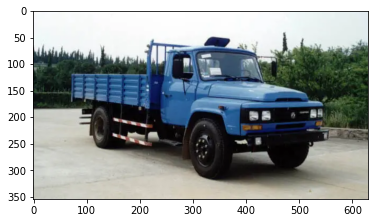

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt 

transform = transforms.Compose(
    [transforms.Resize((32, 32)),                               #调整大小满足网络输入
     transforms.ToTensor(),                                     #转为[C, H, W]
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #标准化 

#           飞机、 汽车、  鸟类、   猫、    鹿、   狗、   蛙类、  马、    船、     卡车
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


class LeNet(nn.Module):                  # 继承于nn.Module这个父类
    def __init__(self):                  # 初始化网络结构
        super(LeNet, self).__init__()    # 多继承需用到super函数
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):            # 正向传播过程
        x = F.relu(self.conv1(x))    # input(3, 32, 32) output(16, 28, 28)
        x = self.pool1(x)            # output(16, 14, 14)
        x = F.relu(self.conv2(x))    # output(32, 10, 10)
        x = self.pool2(x)            # output(32, 5, 5)
        x = x.view(-1, 32*5*5)       # output(32*5*5)-----展开成一维数据，-1意思是计算机自动推理
        x = F.relu(self.fc1(x))      # output(120)
        x = F.relu(self.fc2(x))      # output(84)
        x = self.fc3(x)              # output(10)
        return x
    
LeNet = LeNet() #网络实例化

LeNet.load_state_dict(torch.load('Lenet.pth'))  #导入参数,权重文件

im = Image.open('2.jpg').convert('RGB')      #载入图像-----[H,W,C]
plt.imshow(im)                                 #展示图片
im = transform(im)                             # [C, H, W]
im = torch.unsqueeze(im, dim=0)                # [N, C, H, W]

with torch.no_grad():
    outputs = LeNet(im)
    predict = torch.max(outputs, dim=1)[1].numpy()
print(predict , "预测结果:",classes[int(predict)])
print(outputs)